1- Explore these Topics* Gradient Descent & Types of Gradient Descent
* Validation set & Validation Losss

### Gradient Descent & Types of Gradient Descent

**Gradient Descent**:
- An optimization algorithm used to minimize the loss function by iteratively moving towards the minimum.
- It updates model parameters by computing the gradient of the loss function and moving in the opposite direction.

**Types of Gradient Descent**:
1. **Batch Gradient Descent**:
   - Uses the entire dataset to compute the gradient.
   - Pros: Stable convergence.
   - Cons: Slow for large datasets.
2. **Stochastic Gradient Descent (SGD)**:
   - Uses a single data point to compute the gradient.
   - Pros: Faster and can escape local minima.
   - Cons: Noisy updates can lead to unstable convergence.
3. **Mini-Batch Gradient Descent**:
   - Uses a small batch of data points to compute the gradient.
   - Pros: Balance between stability and speed.
   - Cons: Requires tuning of batch size.

### Validation Set & Validation Loss

**Validation Set**:
- A subset of the dataset used to evaluate the model during training.
- Helps to tune hyperparameters and prevent overfitting by providing an unbiased evaluation.

**Validation Loss**:
- The loss computed on the validation set.
- Monitored to detect overfitting and to determine the optimal stopping point for training.
- If validation loss increases while training loss decreases, it indicates overfitting.

2- Create a MLP model step by step as we discussed in class and load tips data from Seaborn Library.

In [1]:
import seaborn as sns
import pandas as pd

# Load tips dataset
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = tips.drop('tip', axis=1)
y = tips['tip']

# Define preprocessing for numerical and categorical features
numeric_features = ['total_bill', 'size']
categorical_features = ['sex', 'smoker', 'day', 'time']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 9.0328 - val_loss: 4.7727
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1560 - val_loss: 2.4781
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8121 - val_loss: 2.1898
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4080 - val_loss: 2.0269
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5353 - val_loss: 1.8937
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4816 - val_loss: 1.7770
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9439 - val_loss: 1.8313
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9366 - val_loss: 1.7320
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9629 - val_loss: 1.7160
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8580 - val_loss: 1.6949
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7955 - val_loss: 1.7255
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

In [5]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.3873
Test loss: 1.2533178329467773


In [6]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load tips dataset
tips = sns.load_dataset('tips')

# Separate features and target
X = tips.drop('tip', axis=1)
y = tips['tip']

# Define preprocessing for numerical and categorical features
numeric_features = ['total_bill', 'size']
categorical_features = ['sex', 'smoker', 'day', 'time']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Build the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/100


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 13.6122 - val_loss: 7.7216
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9488 - val_loss: 5.1225
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7962 - val_loss: 2.9867
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7910 - val_loss: 2.1005
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7261 - val_loss: 1.8906
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1857 - val_loss: 1.8016
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0855 - val_loss: 1.7975
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0298 - val_loss: 1.7702
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8676 - val_loss: 1.7166
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0329 - val_loss: 1.7138
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7409 - val_loss: 1.6646
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8190 - val_

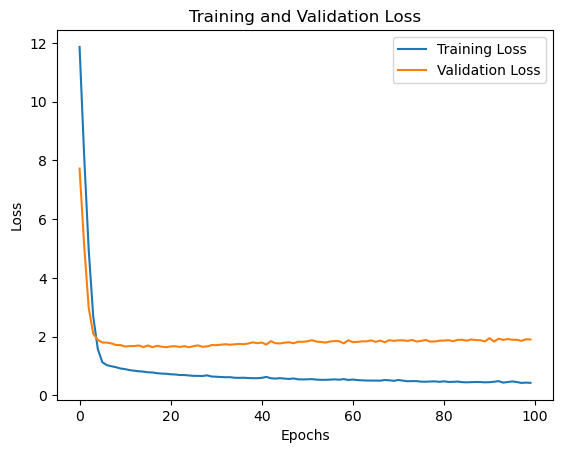

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
